In [46]:
import os
print("If you are using Conda as VENV Management")
print("Please install iPyKernel and Tensorflow using Conda instead of pip:")
print("$ conda install -n kaggle_tf ipykernel --update-deps --force-reinstall")
print("$ conda install tensorflow")

# https://www.tensorflow.org/install/pip
# https://www.tensorflow.org/tutorials/quickstart/beginner

If you are using Conda as VENV Management
Please install iPyKernel and Tensorflow using Conda instead of pip:
$ conda install -n kaggle_tf ipykernel --update-deps --force-reinstall
$ conda install tensorflow


In [47]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.0.0


In [1]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


NameError: name 'tf' is not defined

In [49]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [50]:
x_train[:1].shape

(1, 28, 28)

In [51]:
x = [[1,2],[3,4]]
print(x[:1])
print(x[1:])

[[1, 2]]
[[3, 4]]


In [52]:
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[ 0.3351705 ,  0.08081814,  0.40442878, -0.05981564,  0.12813553,
        -0.30522665,  0.03745343, -0.7205807 , -0.13771395, -0.25899687]],
      dtype=float32)

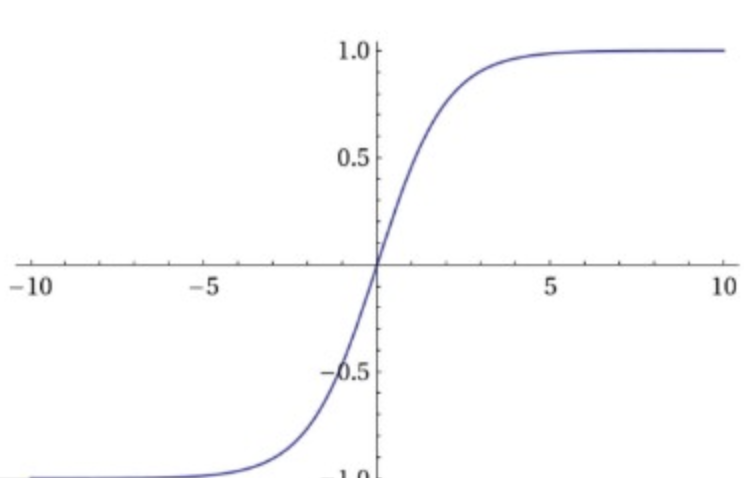

In [53]:
tf.nn.softmax(predictions).numpy()


array([[0.14032012, 0.10880682, 0.15038289, 0.09453218, 0.11407903,
        0.07396036, 0.10418928, 0.04882171, 0.08744778, 0.07745979]],
      dtype=float32)

In [54]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [55]:
loss_fn(y_train[:1], predictions).numpy()


2.604226

In [56]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.fit(x_train, y_train, epochs=5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2916 - accuracy: 0.9162
Epoch 2/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1394 - accuracy: 0.9585
Epoch 3/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1031 - accuracy: 0.9689
Epoch 4/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0846 - accuracy: 0.9743
Epoch 5/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0723 - accuracy: 0.9776


In [59]:
model.evaluate(x_test,  y_test, verbose=2)


10000/1 - 1s - loss: 0.0384 - accuracy: 0.9777


[0.07521086239260621, 0.9777]

In [60]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [61]:
probability_model(x_test[:5])


<tf.Tensor: id=60162, shape=(5, 10), dtype=float32, numpy=
array([[1.33567593e-08, 3.56747272e-08, 3.00986312e-06, 1.49955857e-04,
        8.56743149e-11, 2.27745772e-07, 8.48056773e-14, 9.99839306e-01,
        1.32668731e-07, 7.37262189e-06],
       [2.13470610e-08, 2.73190544e-05, 9.99961734e-01, 1.06653106e-05,
        1.39679358e-14, 3.35079986e-09, 3.10864614e-08, 7.67465085e-13,
        2.14431765e-07, 3.18722167e-14],
       [3.17453157e-07, 9.98692334e-01, 1.59528325e-04, 1.16424435e-05,
        6.55745171e-05, 6.40513599e-06, 2.00897171e-06, 9.09705588e-04,
        1.46793769e-04, 5.68270525e-06],
       [9.99983191e-01, 2.64920574e-09, 9.02158808e-06, 6.41795772e-09,
        8.03469025e-09, 1.24130327e-06, 3.06012885e-06, 3.23124641e-06,
        3.06779158e-09, 2.52697191e-07],
       [7.60368891e-07, 2.53050416e-07, 6.11049063e-06, 1.65487730e-08,
        9.99628305e-01, 1.06749042e-06, 4.30964474e-06, 1.27126346e-04,
        1.13762457e-08, 2.32107312e-04]], dtype=float32)>